In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,NaN,1.56160,3.20140,NaN,NaN,0.98475,NaN,3.65640,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,NaN,NaN,NaN,NaN,1.08500,0.15740,NaN,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	24
float64		column 2	24
float64		column 3	24
float64		column 4	30
float64		column 5	31
float64		column 6	42
float64		column 7	37
float64		column 8	49
float64		column 9	42
float64		column 10	49
float64		column 11	31
float64		column 12	55


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,376.000000,376.000000,376.000000,370.000000,369.000000,358.000000,363.000000,351.000000,358.000000,351.000000,369.000000,345.000000
mean,-0.102389,0.073356,2.053457,1.926754,1.942340,2.006947,1.999017,1.975805,1.968689,2.026395,1.948381,1.983758
std,2.561396,2.776370,1.139948,1.150098,1.174695,1.146585,1.157937,1.149501,1.141987,1.166448,1.152154,1.187431
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007216,0.055837,0.030430,0.001972
25%,-0.696535,-0.781105,1.121975,0.960577,0.878000,1.052125,0.973620,0.975240,1.072625,1.042800,0.908200,0.970820
50%,-0.087594,0.015595,2.095050,1.822600,1.898800,2.053100,2.078600,1.988600,2.074650,2.103500,1.902000,1.926100
75%,0.737807,0.879252,3.012950,2.916575,2.999000,3.013125,2.952300,3.033200,2.930150,3.040500,2.936600,3.027000
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.981000


<AxesSubplot:>

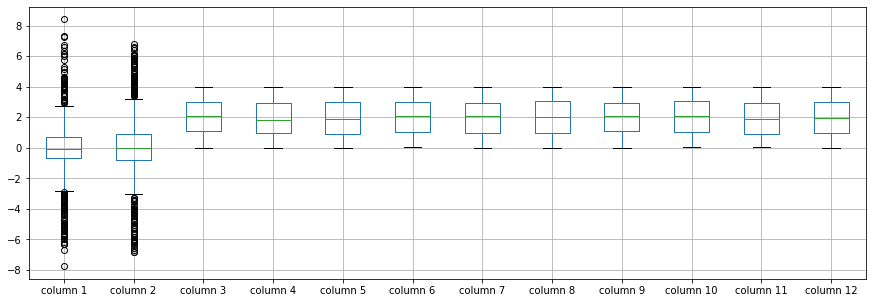

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.102389
column 2     0.073356
column 3     2.053457
column 4     1.926754
column 5     1.942340
column 6     2.006947
column 7     1.999017
column 8     1.975805
column 9     1.968689
column 10    2.026395
column 11    1.948381
column 12    1.983758
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.011669,-0.046502,-0.045316,0.006495,0.009965,-0.029234,0.038621,-0.025171,0.069253,0.074196,0.007153
column 2,0.011669,1.000000,-0.028273,0.041053,-0.083893,-0.064898,0.011679,-0.031867,-0.035879,0.027201,-0.038030,0.069329
column 3,-0.046502,-0.028273,1.000000,0.017348,-0.019288,-0.073300,-0.082627,0.071611,0.126962,-0.008397,-0.067330,0.013180
column 4,-0.045316,0.041053,0.017348,1.000000,-0.009314,0.114186,-0.021969,0.117979,0.022296,0.072437,-0.054726,-0.050178
column 5,0.006495,-0.083893,-0.019288,-0.009314,1.000000,0.072738,0.048263,0.012444,-0.004994,-0.015751,-0.023767,-0.080284
column 6,0.009965,-0.064898,-0.073300,0.114186,0.072738,1.000000,-0.007067,0.077427,0.041864,0.000936,0.029527,-0.057767
column 7,-0.029234,0.011679,-0.082627,-0.021969,0.048263,-0.007067,1.000000,-0.045051,0.089055,0.051273,0.012900,-0.054756
column 8,0.038621,-0.031867,0.071611,0.117979,0.012444,0.077427,-0.045051,1.000000,0.057870,-0.160490,-0.033950,-0.016085
column 9,-0.025171,-0.035879,0.126962,0.022296,-0.004994,0.041864,0.089055,0.057870,1.000000,0.016144,0.024023,0.090524
column 10,0.069253,0.027201,-0.008397,0.072437,-0.015751,0.000936,0.051273,-0.160490,0.016144,1.000000,-0.047386,0.024561


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+27,12+27+27,12+27+27+27,12+27+27+27+27,12+27+27+27+27+27,12+27+27+27+27+27+27,12+27+27+27+27+27+27+27,12+27+27+27+27+27+27,12+27+27+27+27+27,12+27+27+27+27,12+27+27+27,12+27+27,12+27,12], vae_layer = False, seed = 27)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.424879684448243
Epoch: 1 , loss: 25.413539581298828
Epoch: 2 , loss: 25.32968032836914
Epoch: 3 , loss: 25.245165100097655
Epoch: 4 , loss: 25.117584533691407
Epoch: 5 , loss: 24.233867416381838
Epoch: 6 , loss: 22.199660110473634
Epoch: 7 , loss: 21.62996635437012
Epoch: 8 , loss: 21.165281448364258
Epoch: 9 , loss: 21.080412979125978
Epoch: 10 , loss: 20.92471878051758
Epoch: 11 , loss: 20.795659408569335
Epoch: 12 , loss: 20.422955627441407
Epoch: 13 , loss: 20.04362808227539
Epoch: 14 , loss: 19.79653106689453
Epoch: 15 , loss: 19.86509910583496
Epoch: 16 , loss: 19.6927299118042
Epoch: 17 , loss: 19.303364562988282
Epoch: 18 , loss: 19.225072326660158
Epoch: 19 , loss: 19.038173751831053
Epoch: 20 , loss: 18.85037712097168
Epoch: 21 , loss: 18.908044204711913
Epoch: 22 , loss: 18.72486068725586
Epoch: 23 , loss: 18.335542907714842
Epoch: 24 , loss: 18.541028366088867
Epoch: 25 , loss: 18.515226

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.028729
column 2     0.128930
column 3     1.058100
column 4     0.739646
column 5     0.768733
column 6     2.245800
column 7     0.775970
column 8     0.780433
column 9     1.943500
column 10    0.775069
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
4,0.0,0.0,-0.452356,0.0,0.000000,-0.979731,0.843984,0.00000,-0.75173,0.0,-1.623173,1.390138
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.0,0.785822,1.402693,0.104808,-1.56719,0.00000,0.0,1.217228,-1.137799
396,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
397,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
398,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(33.850751007601275, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.20732421062780199

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.886600,2.469600,0.215410,3.09000,0.78343,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.43430,3.129900,1.277800,1.428500,0.14333,1.19480,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.33710,3.768200,1.210000,3.996300,2.21730,3.90290,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.190270,0.567160,1.660100,2.35270,0.66126,3.13510,3.938100,3.734600
4,-0.268400,-1.006000,2.429844,1.56160,3.201400,2.397669,2.366584,0.98475,2.35767,3.65640,2.294027,2.337198
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,1.668512,1.756753,1.732608,1.72681,1.08500,0.15740,1.682268,1.713601
396,0.264630,-6.107600,3.905400,1.33770,1.418700,1.686100,1.095100,3.79360,0.12790,0.54249,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.77210,2.550900,1.470100,0.925400,1.84110,3.47730,0.95496,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.39655,2.999000,3.410100,2.951600,0.27800,0.99059,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AW_10(imp).xlsx", index=False, header=False)